 # Survival Expectancy Analysis - Cox Proportional Hazards Regression


 # <font color = orange>Heart Failure Prediction</font>
    
   Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives
   each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this
   dataset contains 12 features that can be used to predict mortality by heart failure.

   Most cardiovascular diseases can be prevented by addressing behavioral risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

   People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk
   factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and
   management wherein a machine learning model can be of great help.
    
    
 ## <font color = brown>Dataset Link </font>

[1] https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Sec2

[2] https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001#sec010

 ## <font color = brown>Dataset Description</font>

 Feature | Explanation | Measurement	| Range
------------- | ------------- |------------- | -------------
Age	|Age of the patient	|Years |	[40,..., 95]
Anaemia	|Decrease of red <br> blood cells or hemoglobin |	Boolean|	0, 1
High blood pressure |	If a patient has hypertension |	Boolean	 |0, 1
Creatinine phosphokinase<br>(CPK) |	Level of the CPK enzyme <br>in the blood |	mcg/L|	[23,..., 7861]
Diabetes|	If the patient has diabetes |	Boolean	| 0, 1
Ejection fraction|	Percentage of blood leaving<br>the heart at each contraction|Percentage	|	[14,..., 80]
Sex	| Woman or man |	Binary|	0, 1
Platelets|	Platelets in the blood|	kiloplatelets/mL|	[25.01,..., 850.00]
Serum creatinine|	Level of creatinine in the blood|	mg/dL|	[0.50,..., 9.40]
Serum sodium|	Level of sodium in the blood|	mEq/L|	[114,..., 148]
Smoking|	If the patient smokes|	Boolean	|0, 1
Time|	Follow-up period|	Days|	[4,...,285]
DEATH EVENT<br>(TARGET)|	If the patient died during the follow-up period|	Boolean|	0, 1

**NOTE: mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre**

 ### References

    Machine learning can predict survival of patients with heart failure from serum creatinine and
    ejection fraction alone. (03 February 2020)
   https://doi.org/10.1186/s12911-020-1023-5

### <font color = brown>Install Required Libraries</font>

In [1]:
# For survival analysis, we will use the lifelines library which exclusively
# supports survival analysis functions and estimates.

# Reference:

#  [1] https://lifelines.readthedocs.io/en/latest/index.html
#  [2] https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html

# Uncomment the folowing statement if there is an error importing KaplanMeierUtils in the next cell.
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=92b70a985601d0a5d58cefd562137fca979748bdb37b9a75d8aa709dfa2d1388
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


### <font color = brown>Required Libraries and Utilities</font>

In [2]:
# Import the required libraries & modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from ReusableUtils import ReusableUtils
utils = ReusableUtils()

from lifelines import CoxPHFitter

### <font color = brown>Set Notebook Configuration Parameters </font>

In [3]:
utils.setNotebookConfigParams()

/content/ReusableUtils.py:59: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



### <font color = brown>Import Data</font>

In [4]:
heart_faliure_data = pd.read_csv(filepath_or_buffer = './heart_failure_clinical_records_dataset.csv',
                                 low_memory = False,
                                 skipinitialspace = True,
                                 float_precision = 'round_trip')

In [5]:
heart_faliure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
heart_faliure_data.shape

(299, 13)

In [7]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(heart_faliure_data.isnull().sum())

Total NULL Values in each columns
*********************************
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


***This looks to be a clean dataset without any missing values...***

In [8]:
heart_faliure_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


### <font color = brown>Test Dataset</font>

In [9]:
textIdxs = [42, 298, 5, 193, 179]

# extract the test data rows
test_set = heart_faliure_data.iloc[textIdxs]

#drop those rows from the train set
heart_faliure_data.drop(textIdxs, axis = 0, inplace=True)

heart_faliure_data.shape

(294, 13)

#### <font color = blue>Reset the row indexs</font>

In [10]:
test_set['Patient'] = 'Patient - ' + test_set.index.astype(str)
test_set.set_index('Patient', drop = True, inplace = True)
test_set

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
Patient,,,,,,,,,,,,,
Patient - 42,70.0,0,571,1,45,1,185000.0,1.20,139,1,1,33,1
Patient - 298,50.0,0,196,0,45,0,395000.0,1.60,136,1,1,285,0
Patient - 5,90.0,1,47,0,40,1,204000.0,2.10,132,1,1,8,1
Patient - 193,73.0,1,231,1,30,0,160000.0,1.18,142,1,1,180,0
Patient - 179,55.0,0,835,0,40,0,279000.0,0.70,140,1,1,147,0


# <font color = orange>Survival Analysis - Cox Proportional Hazards Model</font>

Cox Proportional Hazards Model introduced by D.Cox allows to compute survival regressions on the time duration using the censored subjects and the features available as part of the dataset based on small intervals containing at most one event of interest. The dependent variable is a hazard function at any given time and the model follows the concept of gradient descent for optimization. Cox model works in a way that the logarithm hazard function for a particular subject act as a linear function of the relevant static features while the hazard function at the population-level changes over time. Mathematically, the hazard model is defined as –




where,
- h(t|x) represents the hazard function.
- b0(t) represents the baseline hazard.
- the summation term represents the log-partial hazard.
- the full exp(…) term  represents the partial hazard.

### <font color = blue>Hazard and Hazard Ratio</font>

1. **Hazard**: Hazard is essentially the inverse of survival, or the probability of failure (death event). It basically represents the **slope of the survival curve** — a measure of how rapidly subjects are dying.

2. **Hazard ratio**: The hazard ratio is the ratio of the hazard rates corresponding to the conditions described by two levels of an explanatory variable. For example, in a drug study, the treated population may die at twice the rate per unit time of the control population. The hazard ratio would be 2, indicating higher hazard of death from the treatment.

### <font color = blue>Proportional Hazards Assumption</font>

1. The most important consideration of the Cox Proportional Hazard equation is that only the baseline hazard is a function of time t, but not the parameters, and the partial hazard is a function of the parameters, but not time. This underpins what is referred to as the proportional hazard assumption.

2. The proportional hazard assumption states that in the context of a Cox Proportional Hazard model, the hazard ratio between two groups is proportional over time. This assumption is implicit in the equation above because the lack of t in the partial hazard means that the partial hazard changes the hazard ratio by some factor, independent of time. [3]

**References -**

1. D. R. Cox, “Regression Models and Life-Tables,” J. R. Stat. Soc. Ser. B, vol. 34, no. 2, pp. 187–220, Apr. 1972, [Online]. Available: http://www.jstor.org/stable/2985181.
2. C. Davidson-Pilon et al., “lifelines: survival analysis in Python,” J. Open Source Softw., vol. 4, no. 40, p. 1317, May 2019, doi: 10.5281/ZENODO.4816284.
3. Cox Proportional Hazards: https://databricks.com/notebooks/telco-accel/03_cox_proportional_hazards.html
4. Hazard Ratio - https://en.wikipedia.org/wiki/Hazard_ratio

# <font color = orange>Cox PH Fitter</font>

In [11]:
CoxFitter = CoxPHFitter(alpha=0.05)

In [12]:
CoxFitter.fit(heart_faliure_data, duration_col='time',
              event_col='DEATH_EVENT',
              show_progress = True)

Iteration 1: norm_delta = 1.03e+00, step_size = 0.9500, log_lik = -496.52054, newton_decrement = 4.23e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.33e-01, step_size = 0.9500, log_lik = -466.04056, newton_decrement = 7.17e+00, seconds_since_start = 0.1
Iteration 3: norm_delta = 8.57e-02, step_size = 0.9500, log_lik = -458.11423, newton_decrement = 8.63e-01, seconds_since_start = 0.1
Iteration 4: norm_delta = 2.05e-02, step_size = 1.0000, log_lik = -457.15298, newton_decrement = 3.45e-02, seconds_since_start = 0.1
Iteration 5: norm_delta = 9.24e-04, step_size = 1.0000, log_lik = -457.11752, newton_decrement = 6.65e-05, seconds_since_start = 0.1
Iteration 6: norm_delta = 1.80e-06, step_size = 1.0000, log_lik = -457.11745, newton_decrement = 2.57e-10, seconds_since_start = 0.2
Convergence success after 6 iterations.


<lifelines.CoxPHFitter: fitted with 294 total observations, 200 right-censored observations>

## <font color = brown>Insight</font>

Since we extracted data of 5 subjects for model validation, we had 294 observations in total to fit the model out of which there are 200 right-censored observations who have not yet had the event (or may have left the study).

#  <font color = Orange>Goodness of Fit</font>

### <font color = blue>Visual Representation of the coefficients (i.e. log hazard ratios)</font>

<Axes: xlabel='log(HR) (95% CI)'>

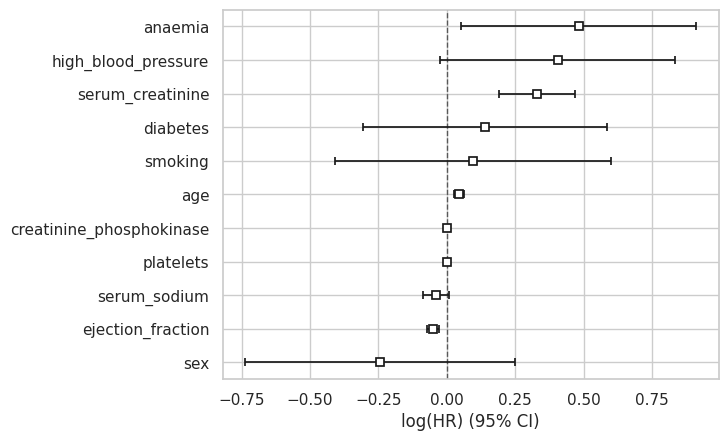

In [13]:
# Plot a visual representation of the coefficients (i.e. log hazard ratios),
# including their standard errors and magnitudes.
CoxFitter.plot()

<Axes: xlabel='HR (95% CI)'>

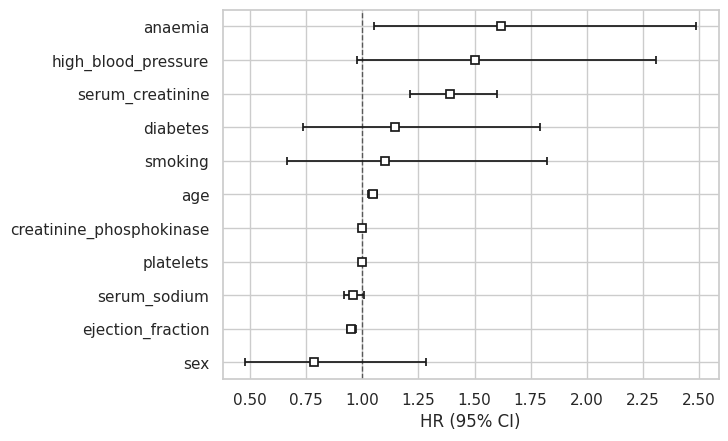

In [14]:
# Plot a visual representation of the hazard ratios,
# including their standard errors and magnitudes.
CoxFitter.plot(hazard_ratios = True)

## <font color = brown>Insight</font>

1. The 2 plots above shows the visual representation of the coefficients - **log hazard ratios** and **hazard ratios** respectively, including their standard errors and magnitudes.

2.  **Anemia**, **High Blood Pressure**, **Serum Creatinine**, **Age** and, **Ejection Fraction** are all within the 95% confidence interval of influencing the DEATH event.

### <font color = blue>Test the Proportional Hazards Assumption</font>


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


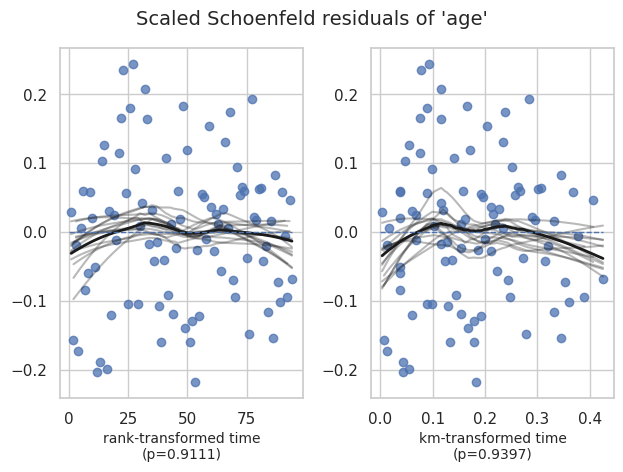

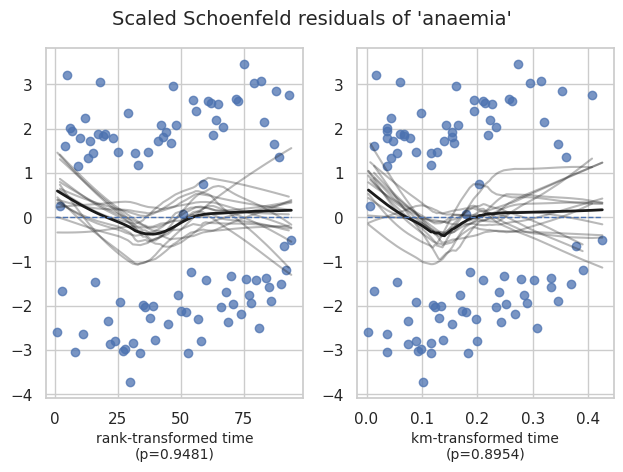

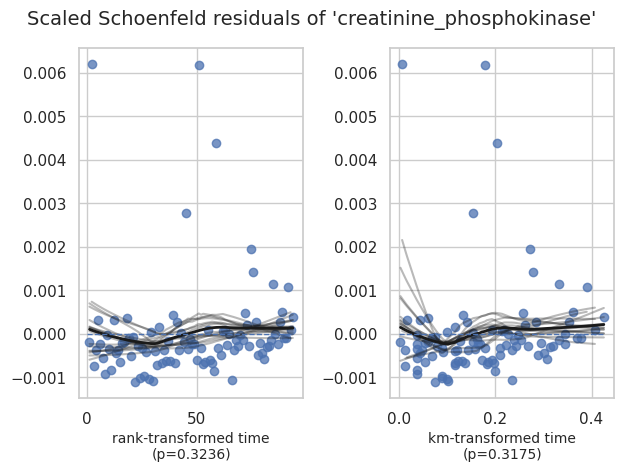

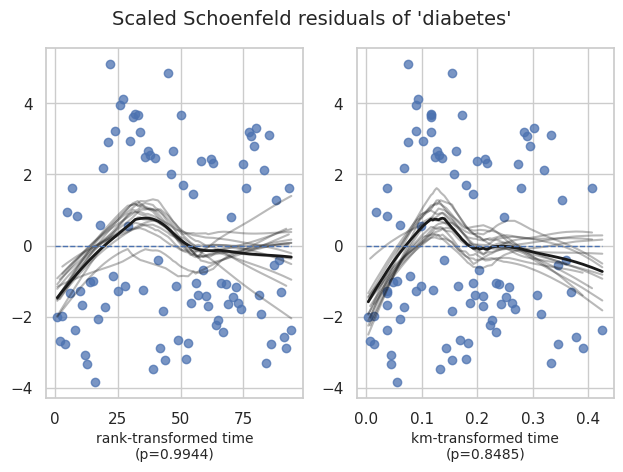

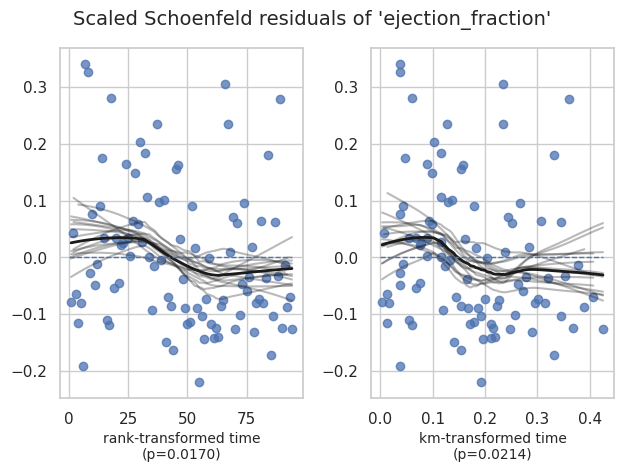

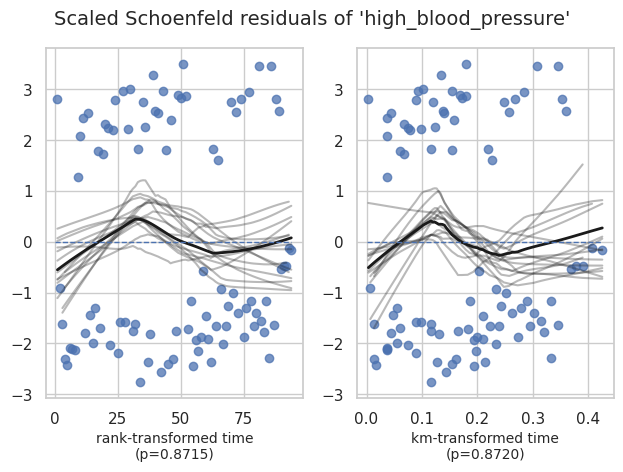

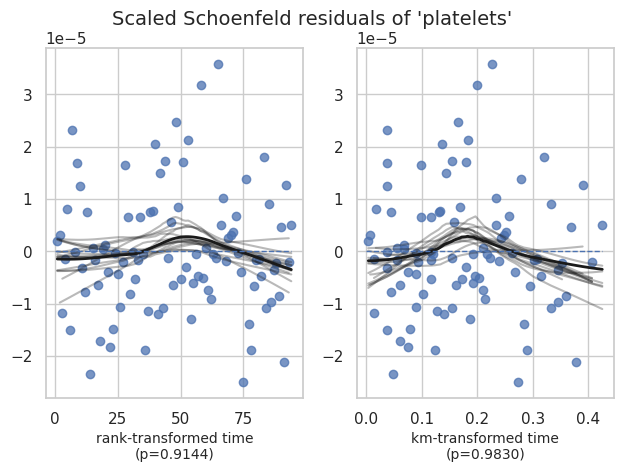

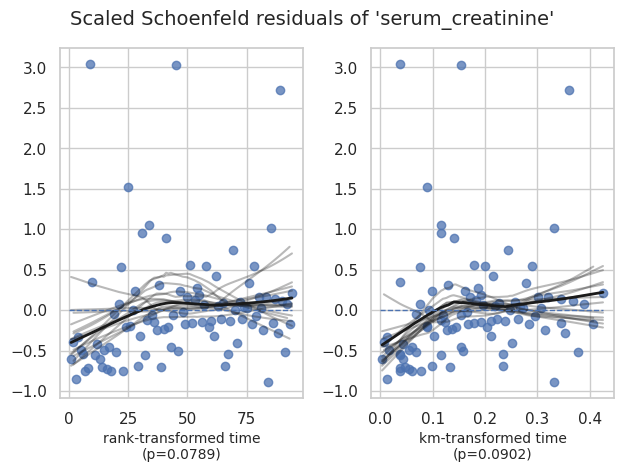

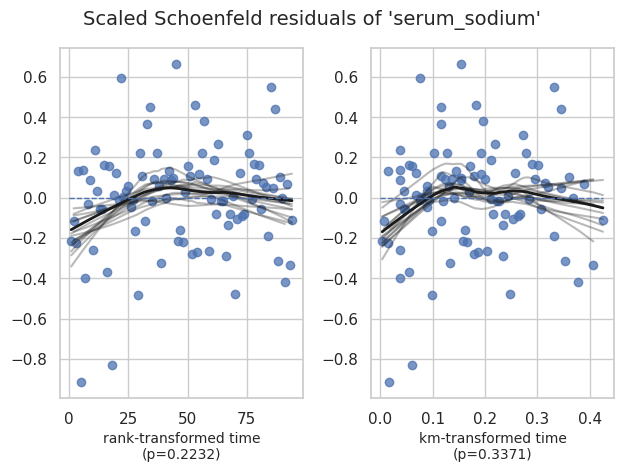

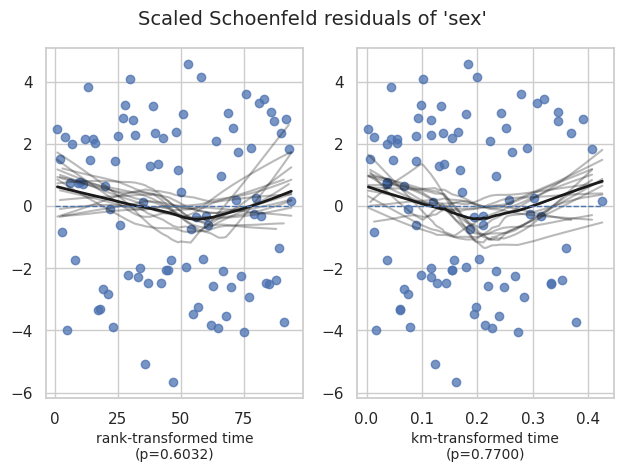

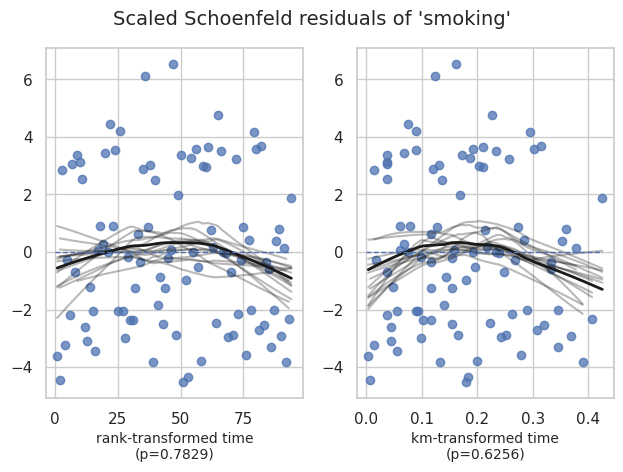

In [15]:
_ = CoxFitter.check_assumptions(heart_faliure_data, show_plots = True)

### <font color = blue>Summary Statistics Describing the Fit</font>

In [16]:
CoxFitter.print_summary(decimals=3)

<lifelines.CoxPHFitter: fitted with 294 total observations, 200 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 294
number of events observed = 94
   partial log-likelihood = -457.117
         time fit was run = 2025-03-24 01:56:53 UTC

---
                           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                  
age                       0.045     1.046     0.009           0.026           0.063               1.026               1.065
anaemia                   0.481     1.618     0.219           0.052           0.911               1.053               2.486
creatinine_phosphokinase  0.000     1.000     0.000           0.000           0.000               1.000               1.000
diabetes                  0.138     1.148     0.227          -0.308           0.584               0.735               1.793
ejection_fraction        -0.051     0.950     0.011          -0.072          -0.031               0.930               0.970
high_blood_pressure       0.406     1.500     0.219          -0.024           0.836               0.976               2.306
platelets                -0.000     1.000     0.000          -0.000           0.000               1.000               1.000
serum_creatinine          0.331     1.392     0.071           0.191           0.470               1.211               1.600
serum_sodium             -0.040     0.960     0.024          -0.087           0.006               0.917               1.006
sex                      -0.244     0.784     0.252          -0.738           0.250               0.478               1.284
smoking                   0.096     1.101     0.257          -0.408           0.600               0.665               1.822

                          cmp to      z       p  -log2(p)
covariate                                                
age                        0.000  4.714 <0.0005    18.654
anaemia                    0.000  2.198   0.028     5.159
creatinine_phosphokinase   0.000  2.275   0.023     5.449
diabetes                   0.000  0.606   0.545     0.877
ejection_fraction          0.000 -4.822 <0.0005    19.421
high_blood_pressure        0.000  1.849   0.064     3.955
platelets                  0.000 -0.282   0.778     0.362
serum_creatinine           0.000  4.646 <0.0005    18.175
serum_sodium               0.000 -1.695   0.090     3.474
sex                        0.000 -0.967   0.334     1.583
smoking                    0.000  0.372   0.710     0.495
---
Concordance = 0.740
Partial AIC = 936.235
log-likelihood ratio test = 78.806 on 11 df
-log2(p) of ll-ratio test = 38.536

## <font color = orange>Insight</font>

###  <font color = brown>p Values and Statistical Significance</font>

The p-values from the summary tell us that **Age**, **Serum Creatinine**, and **Ejection Fraction** are highly significant. Their p-value is less than 0.0005, implying a statistical significance at a (100 – 0.0005) = **99.9995%** or higher confidence level. These features are highly correlated to the death event.

**Smoking**, **Sex**, **Platelets**, and **Diabetes** have very high p-values and hence cannot be said with confidence that they would be statistically significant. So their effect on the hazard rate can be left out from the analysis. This is also evident from their respective large their standard errors, and the correspondingly wide confidence intervals.

### <font color = brown>Interpretation of the Coefficients</font>

#### Anemia
Anemia is a binary indicator variable taking either 1 or 0 and is representative of whether the subject is anemic or not. Its coefficient 0.481 is interpreted as:

$$\frac{Hazard Rate for Patients with Anemia}{Hazard Rate for Patients without Anemia}\$$

$$\implies\frac{e^{0.481 * 1}}{e^{0.481 * 0}}\ = e^{0.481*(1-0)} = e^{0.481} = 1.618$$

`1.618 is the Hazard Ratio associated with anemia. So, if the patient has anemia the instantaneous hazard of death at any given time t, increases by: (1.618 – 1) * 100 = 61.8%.`
    
#### High Blood Pressure
High BP is a binary indicator variable taking either 1 or 0 and is representative of whether the subject has a high of blood pressure (hypertension) or not. Its coefficient 0.406 is interpreted as:

$$\frac{Hazard Rate for Patients with High BP}{Hazard Rate for Patients without High BP}\$$

$$\implies\frac{e^{0.406 * 1}}{e^{0.406 * 0}}\ = e^{0.406*(1-0)} = e^{0.406} = 1.50$$

`1.5 is the Hazard Ratio associated with high blood pressure. So, if the patient has hypertension the instantaneous hazard of death at any given time t, increases by: (1.5 – 1) * 100 = 50%.`

**Similarly, the coefficients can be interpreted for other covariates.**

### <font color = brown>Hazard Ratio (HR)</font>
The value **exp(coef)** is called the **hazard ratio** which indicates ***how much the baseline hazard changes due to one-unit change in the corresponding factor***. A higher hazard means more at risk of the event occurring.

- The hazard ratio is the multiplicative effect of the covariate.
     - HR = 1 indicates no effect.
     - HR > 1 indicates an increase in the hazard as the covariate value rises.
     - HR < 1 indicates a decrease in the hazard as the covariate value rises.
     
For example, If

1. **Ejection Fraction** changes by one unit:
    - coefficient: -0.051
    - hazards ratio: 0.95
    - hazards change: 0.95 – 1 = -0.05
    - survival time change: (1/0.95) - 1 = 0.052 → 5.2% increase in survival time
    - **`The probability of death event decreases by 5.2% for each unit increase in the ejection fraction.`**


2. **Serum Creatinine** changes by one unit:
    - coefficient: 0.331
    - hazards ratio: 1.392
    - hazards change: 1.392 – 1 = 0.392
    - survival time change: (1/1.392) - 1 = -0.281 → 28.1% decrease in survival time
    - **`The probability of death event increases by 28.1% for each unit increase in the serum creatinine.`**


3. **Age** changes by one unit:
    - coefficient: 0.045
    - hazards ratio: 1.046
    - hazards change: 1.046 – 1 = 0.046
    - survival time change: (1/1.046) - 1 = -0.039 → 3.9% decrease in survival time
    - **`The probability of death event increases by 3.9% for each unit increase in age.`**
     
4. HR for **Creatinine Phosphokine** and **Platelets** is equal to 1 and consequently do not affect the death event.

### <font color = brown>Partial Log-Likelihood</font>
The partial log-likelihood of the model is -457.117. This is useful to compare the model’s goodness-of-fit with a different version of the same model, stratified in the same manner, but with fewer or greater number of variables. The model with the larger Partial Log-Likelihood will have a better goodness-of-fit. The actual log-likelihood value for a given model is mostly meaningless, but it’s only useful for comparing two or more similar models.

**Caution:** *When calculating log-likelihood values, it’s important to note that adding more predictor variables to a model will almost always increase the log-likelihood value even if the additional predictor variables aren’t statistically significant. This means you should only compare the log-likelihood values between two regression models if each model has the same number of predictor variables.* [3]

### <font color = brown>Concordance</font>
The C-statistic gives the probability a randomly selected patient who experienced an event (e.g. a disease or condition) had a higher risk score than a patient who had not experienced the event.

Concordance index is a measure of **how discriminant the model is**.
For survival analysis, say you have a covariate 𝑋 and a survival time 𝑇. Assume that higher values of 𝑋 imply shorter value for 𝑇 (thus **𝑋 has a deleterious effect on 𝑇**). Discrimination means that you are able to say, with high reliability, that between two patients which one will have a shorter survival time. [2]

It is equal to the area under the ROC curve and ranges from **[0.5 - 1]**.

- A value below 0.5 indicates a very poor model. Such model is no better than predicting an outcome than random chance.
- Values over 0.7 indicate a good model.
- Values over 0.8 indicate a strong model.
- A value of 1 means that the model perfectly predicts those group members who will experience a certain outcome and those who will not.

**`The Concordance statistic for the current fit is 0.740 indicative of a good model.`**

#### Reference:
1. C-Statistic: Definition, Examples, Weighting and Significance: https://www.statisticshowto.com/c-statistic/
2. Introduction & Description of the C-index: https://stats.stackexchange.com/questions/478294/how-the-concordance-index-is-calculated-in-cox-model-if-the-actual-event-times-a/478305#478305
3. Partial Log-Likelihood: https://www.statology.org/interpret-log-likelihood/

In [17]:
# heart_strata_ef = heart_faliure_data.copy()
# heart_strata_ef['ef_strata'] = pd.cut(heart_faliure_data['ejection_fraction'], bins=[0,30,45, 100])

# heart_strata_ef = heart_strata_ef.drop('ejection_fraction', axis=1)
# heart_strata_ef.head()

# CoxFitter1 = CoxPHFitter(alpha=0.05)
# CoxFitter1.fit(heart_strata_ef, duration_col='time',
#               event_col='DEATH_EVENT',
#               strata=['ef_strata', 'diabetes'],
#               show_progress = True)

In [18]:
# _ = CoxFitter1.check_assumptions(heart_strata_ef, p_value_threshold = 0.05, show_plots = True)
# CoxFitter1.print_summary(decimals=3)

## <font color = orange>Partial Effects of Covariates</font>

Construct plots comparing the baseline curve of the model versus what happens when a covariate(s) is varied over values in a group. This is useful to compare subjects' survival as we vary covariate(s), all else being held equal.

We will study the partial effects of the most important variable identified in the model fit summary above. **Age**, **Serum Creatinine**, and **Ejection Fraction** have **p values <0.0005** and are highly correlated to the death event. **Anaemia** in another significant variable with a p-value of 0.028.  We will analyze the partial effects for these 4 features.

### <font color = blue>Age</font>

Text(0.5, 1.0, 'Partial Effects of Varied Age Groups')

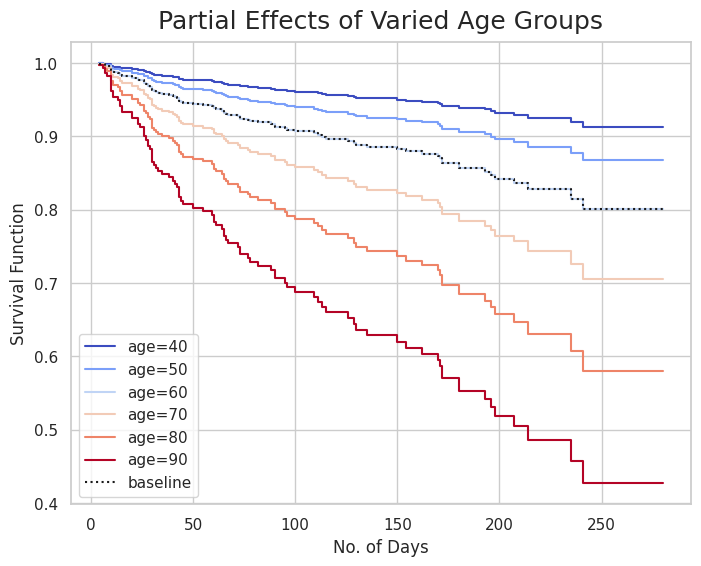

In [19]:
ax = CoxFitter.plot_partial_effects_on_outcome(covariates = 'age',
                                               values = [40, 50, 60, 70, 80, 90],
                                               cmap = 'coolwarm',
                                               figsize=(8, 6),
                                               xlabel = "No. of Days",
                                               ylabel = "Survival Function")
ax.set_title('Partial Effects of Varied Age Groups', fontsize= 18, pad = 10)

### <font color = brown>Insight</font>

- With increasing age, the survival probability decreases for to any complication arising out of a heart failure condition.
- Increasing age has a **deleterious effect** on the survival chances.

### <font color = blue>Ejection Fraction</font>

Text(0.5, 1.0, 'Partial Effects of Varied Ejection Fraction Values')

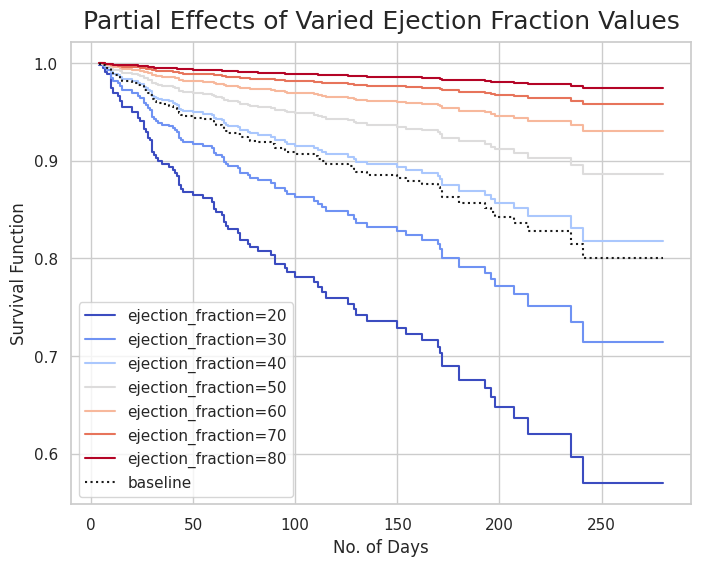

In [20]:
ax = CoxFitter.plot_partial_effects_on_outcome(covariates = 'ejection_fraction',
                                               values = [20, 30, 40, 50, 60, 70, 80],
                                               cmap = 'coolwarm',
                                               figsize=(8, 6),
                                               xlabel = "No. of Days",
                                               ylabel = "Survival Function")

ax.set_title('Partial Effects of Varied Ejection Fraction Values', fontsize= 18, pad = 10)

### <font color = brown>Insight</font>

- With increasing ejection fraction percentage, the volume of blood pumped out of the heart increases and consequently the survival probability also increases during any phase of heart failure condition.
- Increasing EF levels have a **beneficial effect** on the survival chances.


### <font color = blue>Serum Creatinine</font>

Text(0.5, 1.0, 'Partial Effects of Varied Serum Creatinine Values')

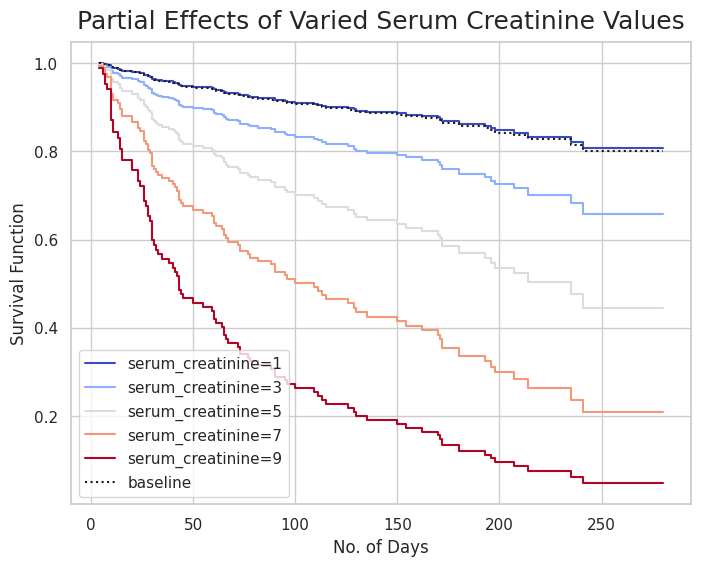

In [21]:
ax = CoxFitter.plot_partial_effects_on_outcome(covariates = 'serum_creatinine',
                                               values = [1, 3, 5, 7, 9],
                                               cmap = 'coolwarm',
                                               figsize=(8, 6),
                                               xlabel = "No. of Days",
                                               ylabel = "Survival Function")

ax.set_title('Partial Effects of Varied Serum Creatinine Values', fontsize= 18, pad = 10)

### <font color = brown>Insight</font>

- With increasing levels of serum creatinine in the blood, the survival probability decreases for to any complication arising out of a heart failure condition.
- Increasing creatinine levels have a **deleterious effect** on the survival chances.

### <font color = blue>Anaemia</font>

Text(0.5, 1.0, 'Partial Effects of Anaemia vs. Non-Anaemia')

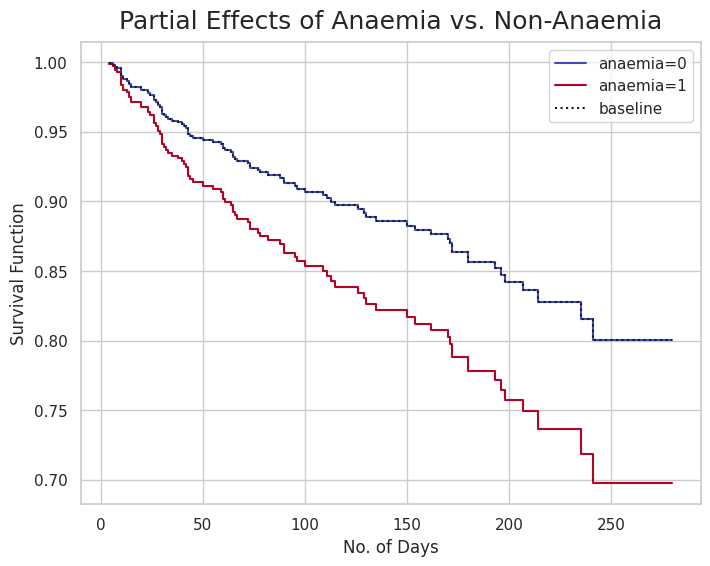

In [22]:
ax = CoxFitter.plot_partial_effects_on_outcome(covariates = 'anaemia',
                                               values = [0, 1],
                                               cmap = 'coolwarm',
                                               figsize=(8, 6),
                                               xlabel = "No. of Days",
                                               ylabel = "Survival Function")
ax.set_title('Partial Effects of Anaemia vs. Non-Anaemia', fontsize= 18, pad = 10)

### <font color = brown>Insight</font>

- Anaemic patients show a greater probability of encountering a hazard due to heart failure condition.


## <font color = orange>Test Data</font>
### <font color = brown>Survival Function for Individuals</font>

In [23]:
# Predict the survival function for individuals, given their covariates. This assumes that the individual
# just entered the study (that is, we do not condition on how long they have already lived for.)
survival_function_data = CoxFitter.predict_survival_function(test_set)

# extract the head 10 and tail 10 for analysis...
head = survival_function_data.head(10)
tail = survival_function_data.tail(10)

utils.display_dataframe_side_by_side(dataframes = [head, tail],
                                     table_captions = ['First 10 days...<br></br>', 'Last 10 days...<br></br>'],
                                     master_caption = 'Survival Probabilities over a time period of 280 days...',
                                     tablespacing = 15)

Survival Probabilities over a time period of 280 days...

,Patient - 42,Patient - 298,Patient - 5,Patient - 193,Patient - 179
4.000000,0.998049,0.999487,0.986352,0.995726,0.999371
6.000000,0.996077,0.998968,0.972722,0.991416,0.998735
7.000000,0.992129,0.997926,0.945912,0.982817,0.997458
8.000000,0.990145,0.997402,0.932683,0.978512,0.996815
10.000000,0.978008,0.994176,0.855153,0.952398,0.992863
11.000000,0.973273,0.992909,0.826442,0.942314,0.991313
12.000000,0.973273,0.992909,0.826442,0.942314,0.991313
13.000000,0.970899,0.992272,0.812365,0.937281,0.990533
14.000000,0.966155,0.990996,0.784839,0.927264,0.988972
15.000000,0.961395,0.989712,0.758036,0.917276,0.987400


## <font color = brown>Insight</font>

We analyze the survival probabilities of the subjects in the test cohort. The probabilities are returned for a period of 280 days. This assumes that the subjects just entered the study (i.e., it does not consider the time of how long they have already lived for). The following observations are noted -

   1. For each subject in the test cohort, the survival probability starts with high survival chances revolving around the 98-99% mark.
   2. PATIENT-298 and PATIENT-179: The survival probability remain consistent through out the period with 88% and 85.5% respectively around the 280th day.
   3. PATIENT-42 and PATIENT-193: The survival probability hovers around 61% and 34% respectively at the end of 280 days.
   4. PATIENT-5: The chances of survival quickly starts to show a decreasing trend. By the end of day 15 the survival chance is ~75%, by day 38 hovers around the 50% mark, and by the end of 180 days falls below 10%.


# <font color = orange>Survival Function Plot</font>

Plotting the survival probabilities computed above for a comparative analysis

<Axes: title={'center': 'Survival Function for Individuals'}, xlabel='No. of Days', ylabel='Survival Function'>

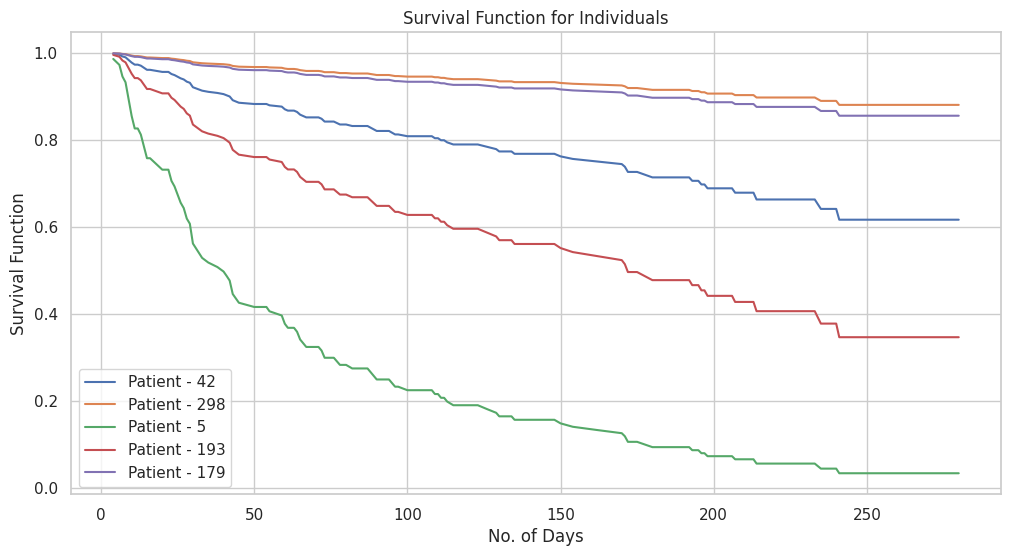

In [24]:
survival_function_data.plot(figsize=(12, 6),
                            title = "Survival Function for Individuals",
                            xlabel = "No. of Days",
                            ylabel = "Survival Function")

## <font color = orange>Survival / Lifetime Expectancy</font>

Compute the expected lifetime, `E[T]`, using covariates X.

In [25]:
CoxFitter.predict_expectation(test_set)

,0
Patient - 42,212.394631
Patient - 298,257.168879
Patient - 5,63.755276
Patient - 193,159.292306
Patient - 179,253.138650
